<a href="https://colab.research.google.com/github/SayaliGanvir/Heat-Transfer/blob/main/HeatTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set Dimension and delta
lenX = 50
lenY = 60
#we set it rectangular
delta = 10 #spatial
alpha = 18.8
del_t = 1 #secondalpha*del_t/(delta*delta)s
F_o = alpha*del_t/(delta*delta)
t_total = 1000 #seconds
n = int(t_total/del_t) # no of timesteps
print(lenY)
k = 63.9
print(F_o)

60
0.188


In [ ]:
# Boundary condition
Ttop = 300
Tbottom = 300
Tleft = 600
Tright = 700
q = 700
# Initial guess of interior grid
Tguess = 30


In [ ]:
# Set colour interpolation and colour map.
# You can try set it to 10, or 100 to see the difference
# You can also try: colourMap = plt.cm.coolwarm
colorinterpolation = 50
colourMap = plt.cm.jet

In [ ]:
# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenY), np.arange(0, lenX))
# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)
# Set Boundary condition
T[0] = Ttop
T[-1] = Tbottom
T[:, -1] = Tright
T[:, 0] = Tleft
print(T)
np.shape(X)

[[600. 300. 300. ... 300. 300. 700.]
 [600.  30.  30. ...  30.  30. 700.]
 [600.  30.  30. ...  30.  30. 700.]
 ...
 [600.  30.  30. ...  30.  30. 700.]
 [600.  30.  30. ...  30.  30. 700.]
 [600. 300. 300. ... 300. 300. 700.]]


(50, 60)

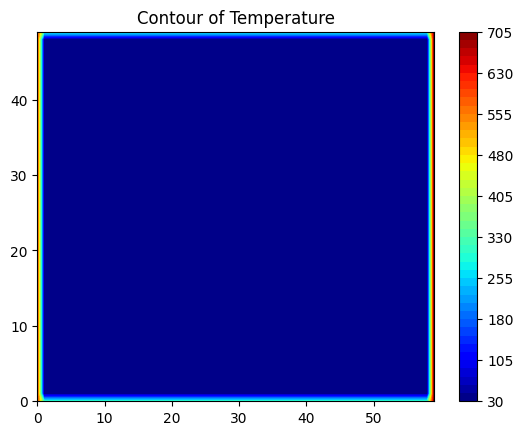

In [ ]:
# Configure the contour
plt.title("Contour of Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

print("")

In [ ]:
T_n  = np.zeros((lenX, lenY))#Initialisation
T_0 = T
print(T_0)
np.shape(T_0)

[[600. 300. 300. ... 300. 300. 700.]
 [600.  30.  30. ...  30.  30. 700.]
 [600.  30.  30. ...  30.  30. 700.]
 ...
 [600.  30.  30. ...  30.  30. 700.]
 [600.  30.  30. ...  30.  30. 700.]
 [600. 300. 300. ... 300. 300. 700.]]


(50, 60)

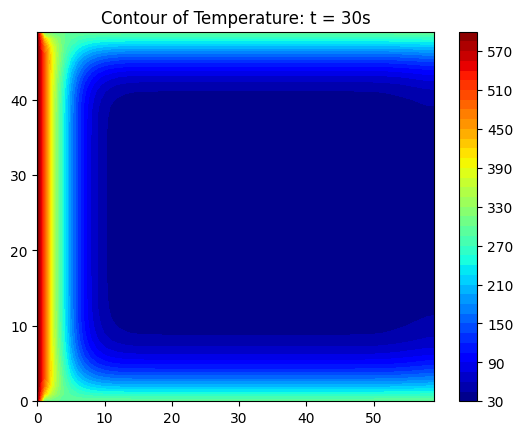

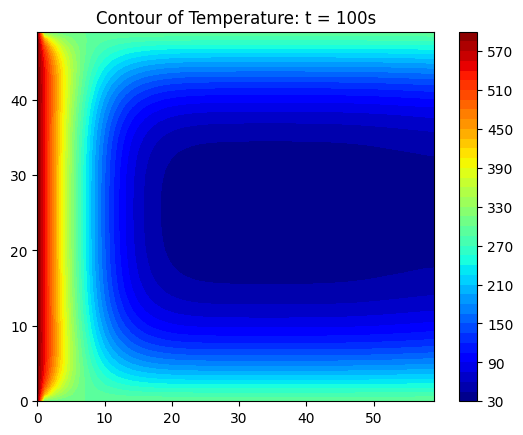

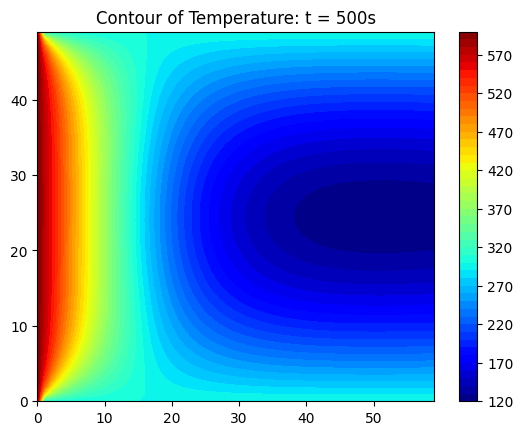


[[600.         300.         300.         ... 300.         300.
  300.        ]
 [600.         449.60379518 389.91318976 ... 294.44907827 294.48963969
  294.55758947]
 [600.         508.50460787 448.42041093 ... 288.91720181 288.98174589
  289.06796846]
 ...
 [600.         508.52476617 448.46062371 ... 289.28616807 289.350164
  289.43627089]
 [600.         449.6143727  389.93429024 ... 294.64278167 294.68305291
  294.75094177]
 [600.         300.         300.         ... 300.         300.
  300.        ]]


In [ ]:
count = 0
for iteration in range(0, n):
    T_0[0] = Ttop
    T_0[-1] = Tbottom
    #T_0[:, -1] = Tright
    T_0[:, 0] = Tleft
    for a in range(1, lenX-1, 1):
        T_0[a,-1]= delta*0.001*q/(2*k)+ 0.25*(2*T_0[a,-2]+ T_0[a+1,-1]+T_0[a-1,-1])
        #print(a)

    for i in range(1, lenX-1, 1):
        for j in range(1, lenY-1, 1):
            T_n[i,j] = F_o*(T_0[i+1,j] + T_0[i-1,j] + T_0[i,j+1] + T_0[i,j-1] - 4*T_0[i,j]) + T_0[i,j]
    T_0 = T_n
    if (iteration == 30):
        # Configure the contour
        plt.title("Contour of Temperature: t = 30s")
        plt.contourf(X, Y, T_n, colorinterpolation, cmap=colourMap)
        # Set Colorbar
        plt.colorbar()
        # Show the result in the plot window
        plt.show()
        print("")
    elif (iteration == 100):
        # Configure the contour
        plt.title("Contour of Temperature: t = 100s")
        plt.contourf(X, Y, T_n, colorinterpolation, cmap=colourMap)
        # Set Colorbar
        plt.colorbar()
        # Show the result in the plot window
        plt.show()
        print("")
    elif (iteration == 500):
        # Configure the contour
        plt.title("Contour of Temperature: t = 500s")
        plt.contourf(X, Y, T_n, colorinterpolation, cmap=colourMap)
        # Set Colorbar
        plt.colorbar()
        # Show the result in the plot window
        plt.show()
        print("")

    count = count+1
print(T_n)

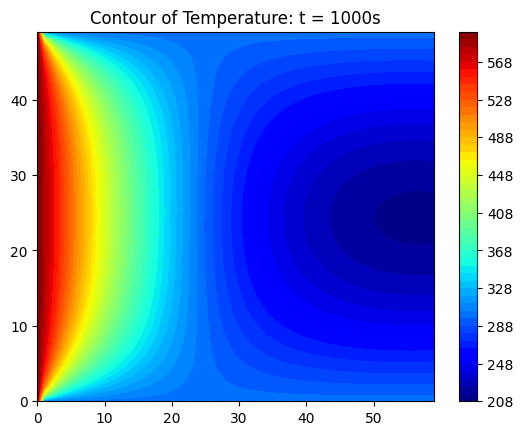

In [ ]:
# Configure the contour
plt.title("Contour of Temperature: t = 1000s")
plt.contourf(X, Y, T_n, colorinterpolation, cmap=colourMap)
# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

print("")